In [55]:
"""import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [56]:
df = pd.read_csv("sf_data.csv")#,sep=',',index_col="Date",parse_dates=True)
df.index = df['Date']
df['mwe_total'] = df['Unit1'] + df['Unit2']
df['sf_total'] = df['701'] + df['702']
df['sf_bo_total'] = df['701'] + df['702'] + df['701a'] + df['702a'] + df['701b'] + df['702b'] + \
                    df['701c'] + df['702c']
df['bo_total'] = df['701a'] + df['702a'] + df['701b'] + df['702b'] + df['701c'] + df['702c']
df['pad_e'] = df['301-302'] + df['303_304'] + df['305_306']
df['pad_hf'] = df['401_402'] + df['403_404'] + df['405']
df['sf_prs'] = df['pad_e'] + df['pad_hf'] + df['508']
df['diff_prs_if'] = df['sf_prs'] - df['sf_total']
df['diff_prs_bo'] = df['sf_prs'] - df['sf_bo_total']
df['pdiff_prs_if'] = 100 * (df['sf_prs'] - df['sf_total'])/df['sf_total']
df['pdiff_prs_bo'] = 100 * (df['sf_prs'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_wellhead'] = 1008.2
df['pdiff_bom_if'] = 100 * (df['bom_wellhead'] - df['sf_total'])/df['sf_total']
df['pdiff_bom_prs'] = 100 * (df['bom_wellhead'] - df['sf_prs'])/df['sf_prs']
df['pdiff_bom_bo'] = 100 * (df['bom_wellhead'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_if'] = 977.95
df['bom_pad_e'] = 418.68
df['bom_pad_hf'] = 510.12
df['bom_pad_c'] = 79.2

In [57]:
def get_data(dates, full_df, cols):
    """create a df with the specified date range and variables to plot"""
    #Create a dataframe with the given date range as index
    df = pd.DataFrame(index=dates)
    #Read the WHP data from the .csv file
    df_temp = full_df[cols]
    #Join the given date_range data frame with the imported whp dataframe                    
    df = df.join(df_temp)
    return df

def plot_data(df, ylabel, title):
    #Define size of the plot
    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
    """Plot stock WHP with a custom title and axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    
def nan_outlier(group, stds):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

In [58]:
"""Define Date Range Here"""
start_date = '2016-08-18 00:00:00'      
end_date = '2016-08-28 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')
%matplotlib inline
title = ""
yl_sf = "Steam Flow (TPH)"
yl_mwe = "MWe"
yl_diff = "% Difference"

## Generation (MWe)

             Unit1        Unit2
count  1584.000000  1584.000000
mean     57.839064    58.160699
std       3.840513     0.976701
min      29.869999    35.259998
25%      58.049999    57.919998
50%      58.459999    58.254999
75%      58.799999    58.532498
max      59.719997    59.259998


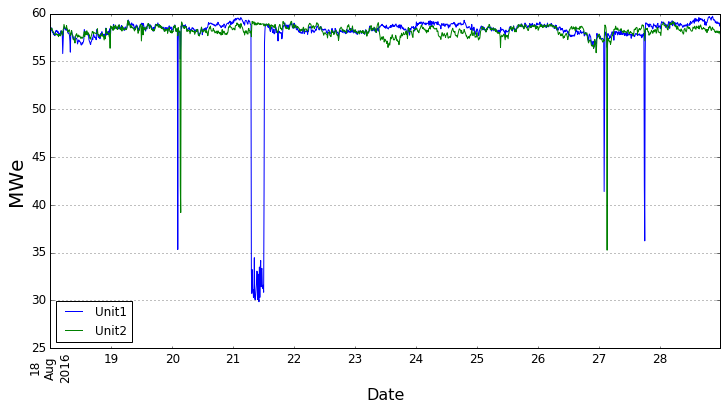

In [59]:
variables = ['Date', 'Unit1', 'Unit2']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_mwe, title)

## Steam Supplied (TPH)

               701          702
count  1584.000000  1584.000000
mean    472.919159   485.324970
std      29.830628     6.472838
min     250.279343   337.522308
25%     474.005035   483.724838
50%     477.174606   485.840454
75%     479.978401   487.828194
max     487.912781   491.496704


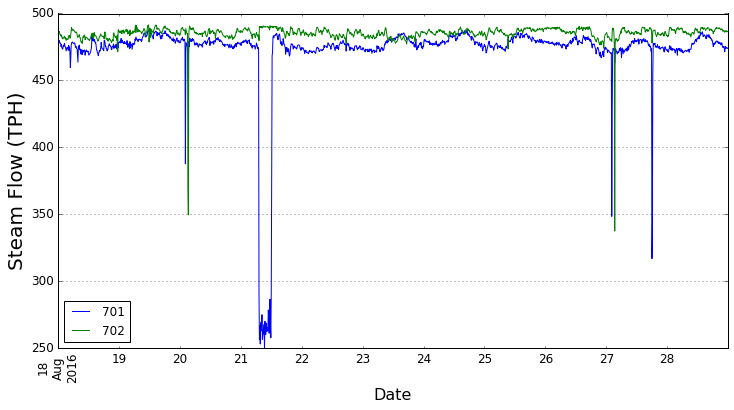

In [60]:
variables = ['Date', '701', '702']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Steam Flow Data (Interface, w/ Blow-off, PRS)

       bom_wellhead       sf_prs  sf_bo_total     sf_total
count  1.584000e+03  1584.000000  1584.000000  1584.000000
mean   1.008200e+03   986.161362   972.242864   958.244129
std    2.854441e-11    17.091695    14.322364    30.301023
min    1.008200e+03   904.939674   894.762775   740.312637
25%    1.008200e+03   977.106035   965.235731   958.715225
50%    1.008200e+03   986.451487   969.965826   962.622009
75%    1.008200e+03   994.561035   975.701119   966.717728
max    1.008200e+03  1077.142349  1141.960791   979.311005


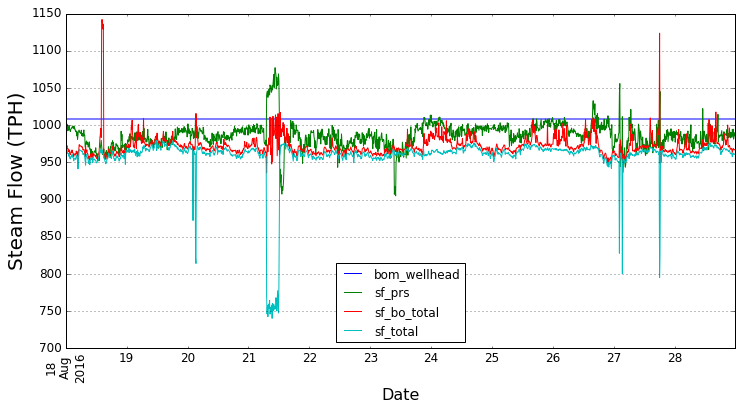

In [61]:
variables = ['Date', 'bom_wellhead', 'sf_prs', 'sf_bo_total', 'sf_total']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)
#df_temp.corr()

## Do we still have blow-off?

          bo_total
count  1584.000000
mean     13.998735
std      34.003350
min       5.885265
25%       6.010675
50%       6.040038
75%       6.077027
max     328.530450


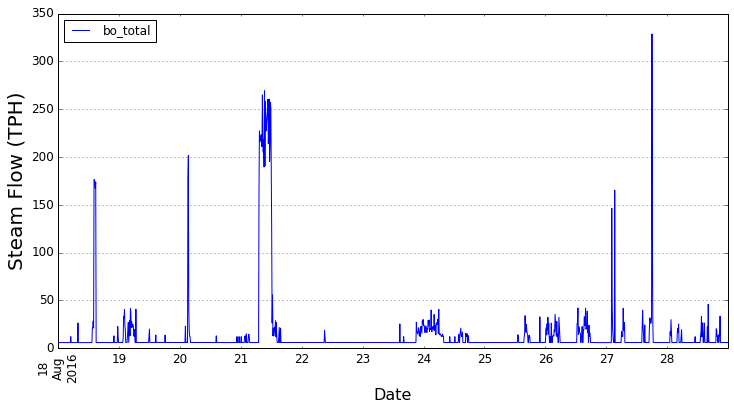

In [62]:
variables = ['Date', 'bo_total']
df_temp = get_data(dates, df, variables)
#nan_outlier(df_temp['bo_total'], 1.96)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Percent Difference in Steam Flow Measurement (PRS vs Interface; PRS vs Interface + Blow Off)

       pdiff_prs_if  pdiff_prs_bo  pdiff_bom_if  pdiff_bom_bo
count   1584.000000   1584.000000   1584.000000   1584.000000
mean       3.078915      1.447797      5.343841      3.719211
std        5.476873      2.031579      4.136569      1.419682
min       -6.821984    -15.580253      2.949931    -11.713256
25%        1.442817      0.588945      4.291043      3.330823
50%        2.385651      1.533843      4.734775      3.941806
75%        3.308016      2.390868      5.161572      4.451169
max       42.993979     11.181747     36.185707     12.677911


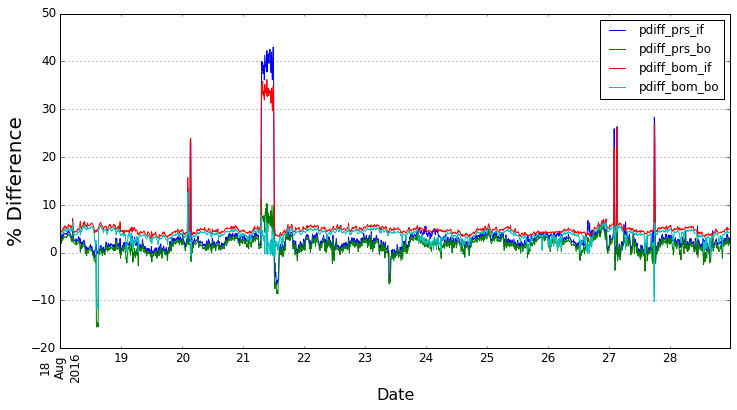

In [63]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_if', 'pdiff_bom_bo']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_diff, title)

## Remove Outliers (Outside 1.96*SD)

       pdiff_prs_if  pdiff_prs_bo  pdiff_bom_if  pdiff_bom_bo  pdiff_bom_prs
count   1546.000000   1527.000000   1546.000000   1538.000000    1584.000000
mean       2.269885      1.462045      4.715580      3.854479       2.265248
std        1.494204      1.278346      0.654955      0.910122       1.760544
min       -6.821984     -2.484225      2.949931      0.955933      -6.400486
25%        1.401635      0.615380      4.273518      3.403668       1.371355
50%        2.336928      1.531369      4.716193      3.987633       2.204722
75%        3.233732      2.367005      5.132643      4.468053       3.182251
max       13.519804      5.326545     10.755979      6.447254      11.410741


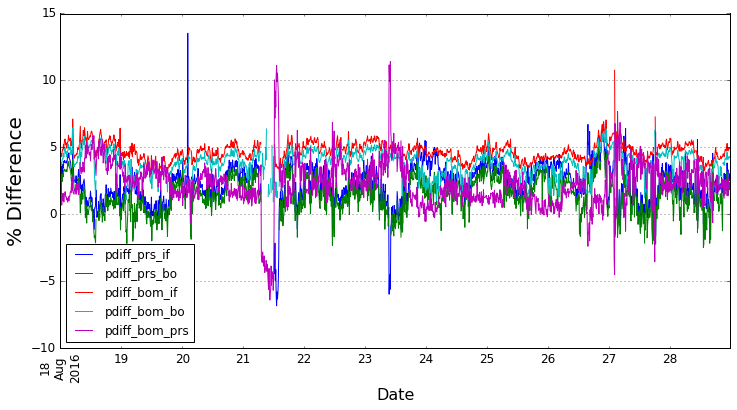

In [64]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_if', 'pdiff_bom_bo', 'pdiff_bom_prs' ]
df_temp = get_data(dates, df, variables)
nan_outlier(df_temp['pdiff_prs_if'], 1.96)
nan_outlier(df_temp['pdiff_prs_bo'], 1.96)
nan_outlier(df_temp['pdiff_bom_if'], 1.96)
nan_outlier(df_temp['pdiff_bom_bo'], 1.96)
print df_temp.describe()
plot_data(df_temp, yl_diff, title)

## Histogram and Boxplot of % difference in steam flow measurement from PRS to Interface (with Blow-Off)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010C871D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B310B8>]], dtype=object)

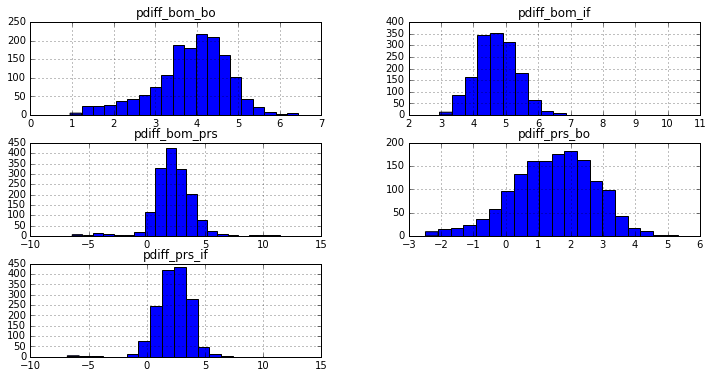

In [65]:
df_temp.hist(bins=20)

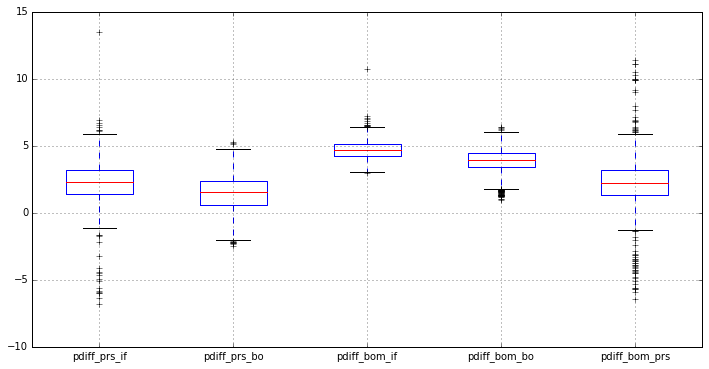

In [66]:
df_temp.boxplot(return_type='axes')

       pdiff_prs_bo           rm         u_rm         l_rm
count   1527.000000  1098.000000  1098.000000  1098.000000
mean       1.462045     1.551411     2.460481     0.642340
std        1.278346     0.671812     0.653310     0.771761
min       -2.484225    -0.240997     0.346274    -1.018292
25%        0.615380     1.180782     2.066463     0.106206
50%        1.531369     1.533131     2.507675     0.659338
75%        2.367005     2.006324     2.959252     1.189273
max        5.326545     2.967805     3.750829     2.448288


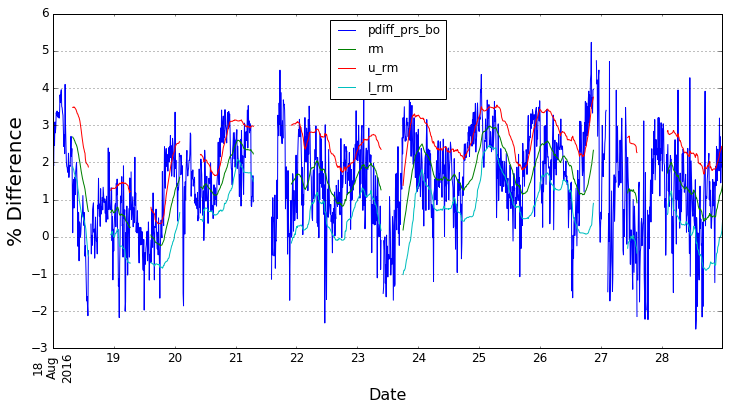

In [80]:
variables = ['Date', 'pdiff_prs_bo']
df_temp = get_data(dates, df, variables)
nan_outlier(df_temp['pdiff_prs_bo'], 1.96)
df_temp['rm'] = df_temp['pdiff_prs_bo'].rolling(window=48, center=False).mean()

df_temp['u_rm'] = df_temp['rm'] + df_temp['pdiff_prs_bo'].rolling(window=48, center=False).std()
df_temp['l_rm'] = df_temp['rm'] - df_temp['pdiff_prs_bo'].rolling(window=48, center=False).std()
print df_temp.describe()
plot_data(df_temp, yl_diff, title)